In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa

In [3]:
def TwoSpecies(t,y):
    s1=y[0]
    s2=y[1]
    p1=y[2]
    p2=y[3]
    lambda1=mu1/mu10-1
    lambda2=mu2/mu20-1

    dydt=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dydt

In [4]:
D=0.2
mms=np.arange(4,8,0.5)

gamma=0.9
kappa=0.005

num=500
mu10=0.5
mu20=0.5
mu1s=np.random.rand(num)
mu2s=np.random.rand(num)

initial=[0.5,0.5,0,0]
timespan=np.arange(0,301,1)

en=6
etacs=[0,-7]
S1=np.zeros((len(mms),len(etacs),num))
S2=np.zeros((len(mms),len(etacs),num))

for i in range(len(mms)):
    print(i)
    mm=mms[i]
    for j in range(len(etacs)):
        if j==0:
            eta=0
        else:
            eta=10**(etacs[j]+mm)
        for k in range(num):
            mu1=mu1s[k]
            mu2=mu2s[k]
            sol=solve_ivp(TwoSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            S1[i,j,k]=y[-1,0]
            S2[i,j,k]=y[-1,1]


0
1
2
3
4
5
6
7


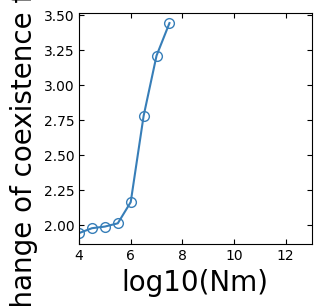

In [5]:
thresh=0.01
prob=np.zeros((len(mms),len(etacs)))
for i in range(len(mms)):
    for j in range(len(etacs)):
        pin=0
        for k in range(num):
            if min(S1[i,j,k],S2[i,j,k])>thresh:
                pin=pin+1
        prob[i,j]=pin/num

plt.figure(figsize=(3,3))
plt.plot(mms,np.divide(prob[:,1],prob[:,0]),'o-',markersize=7,fillstyle='none',color=(0.2157,0.4941,0.7216))
plt.box('off')
plt.xlim(4,13)
plt.xlabel('log10(Nm)',fontsize=20)
plt.ylabel('Fold change of coexistence feasibility',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('ChangingNm_2.pdf')
plt.show()

In [6]:
import pandas as pd
df=pd.DataFrame(prob)
df.to_csv("SourceData2.csv")